<a href="https://colab.research.google.com/github/indmind/2141720003-pcvk-2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


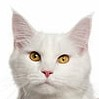

In [3]:
from google.colab.patches import cv2_imshow
path = "/content/drive/MyDrive/Semester 5/pcvk/week11"

img = cv.imread(f'{path}/animal-template.jpg')
cv2_imshow(img)

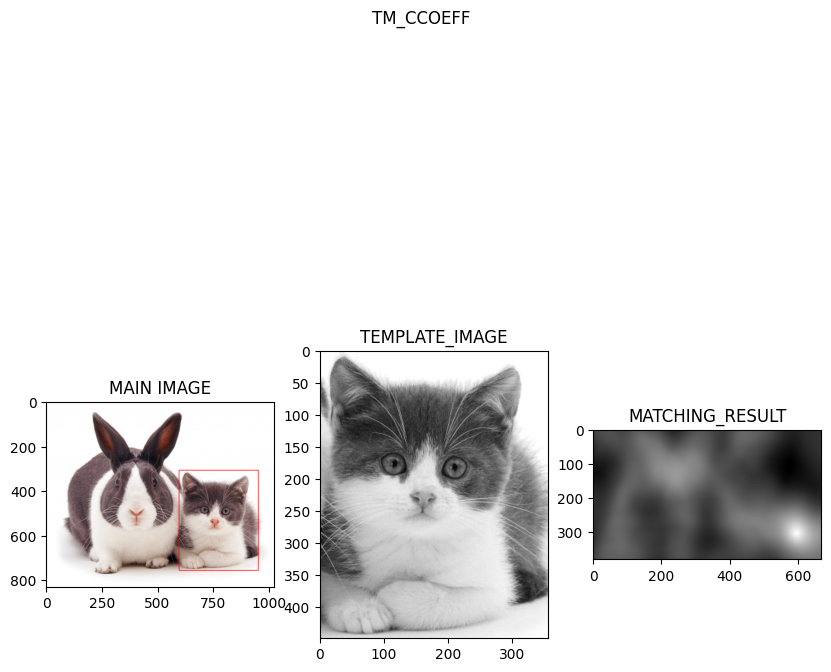

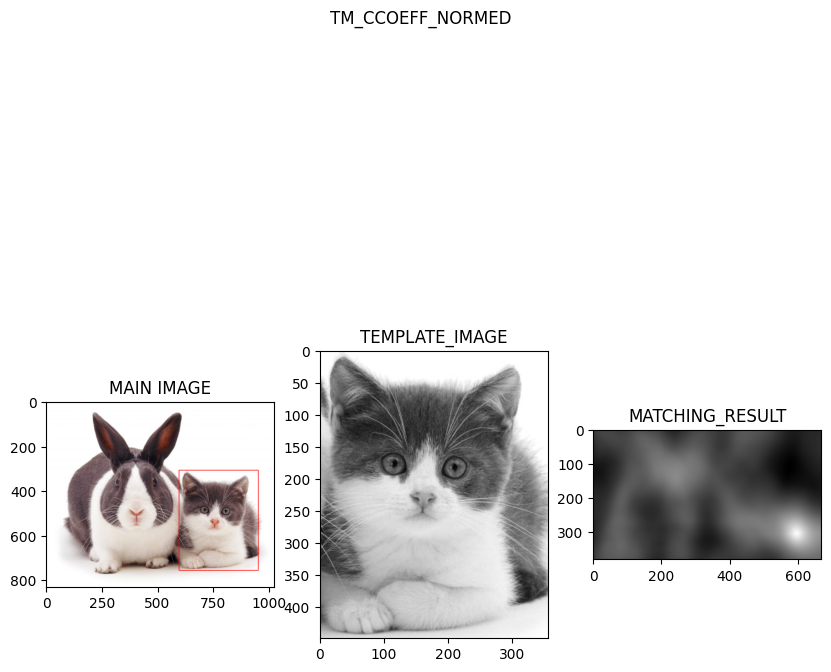

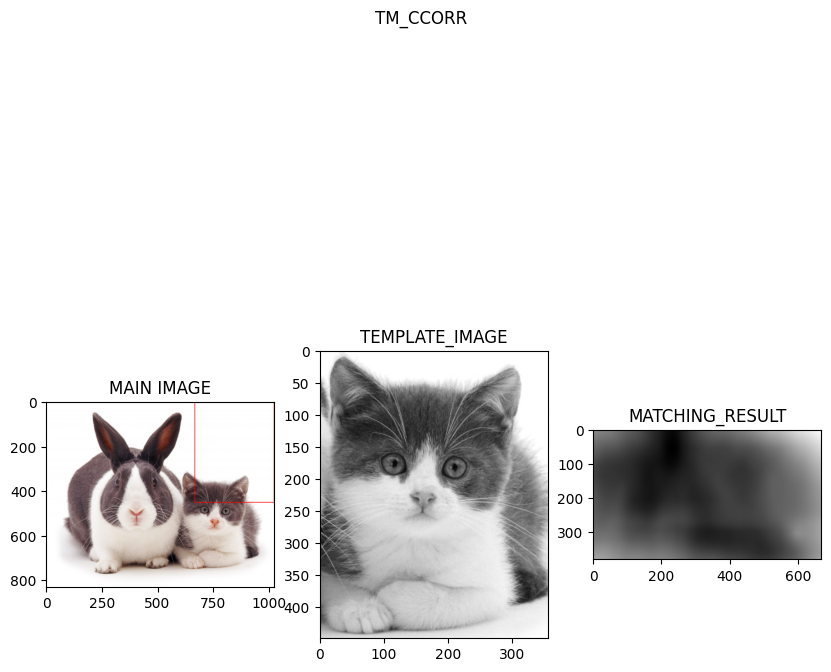

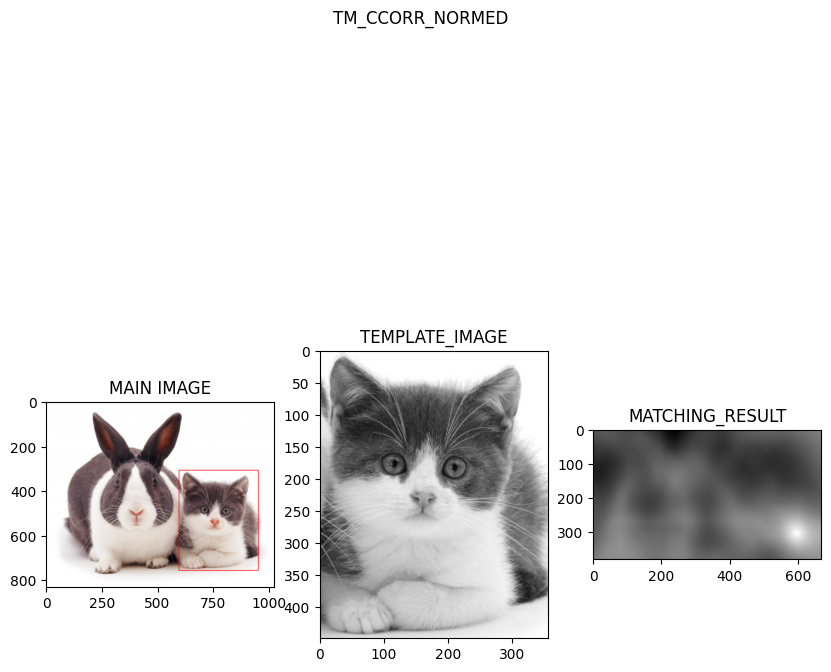

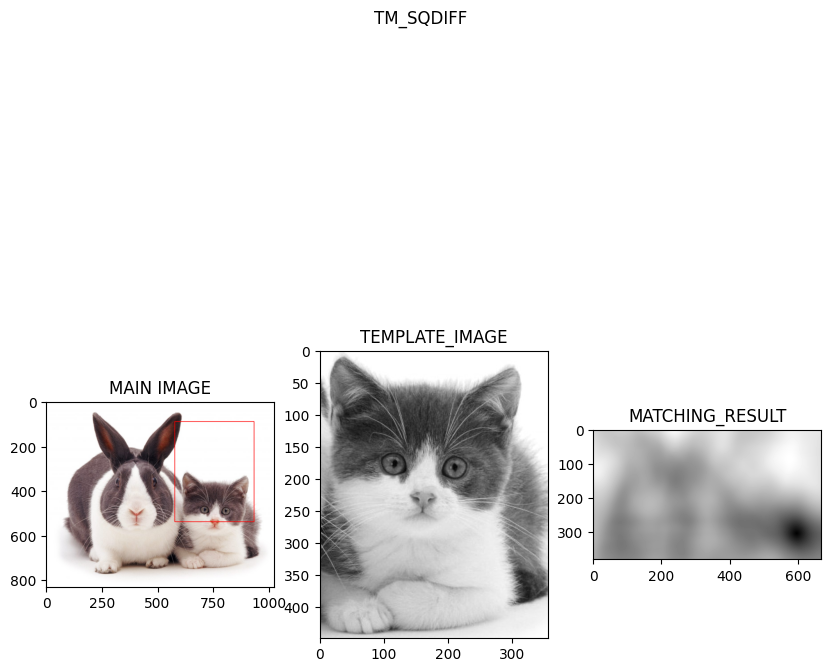

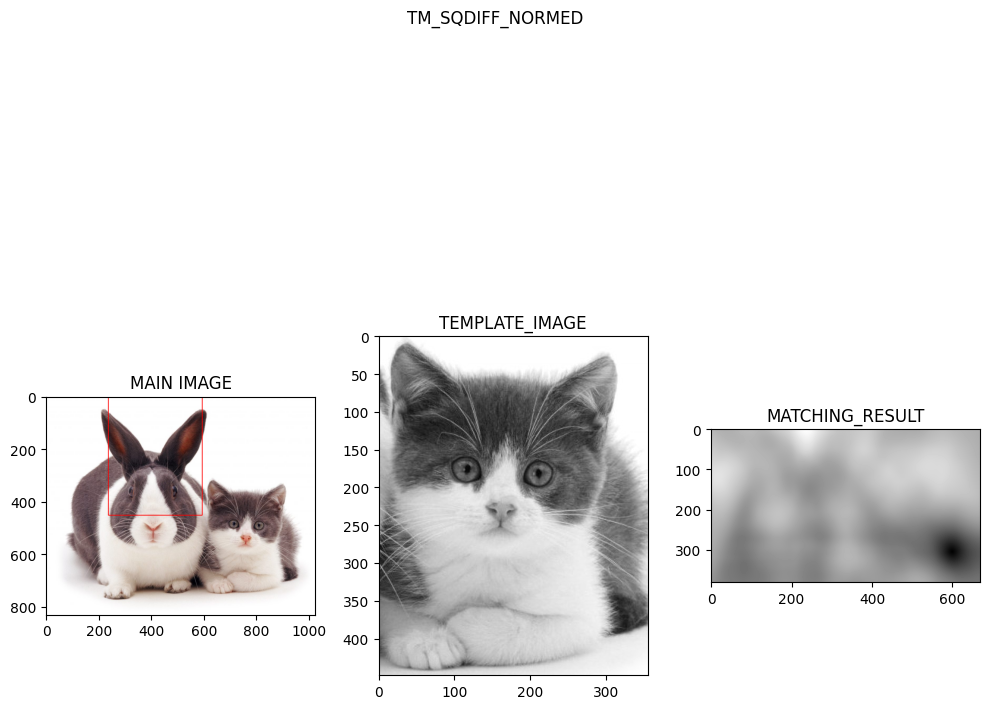

In [4]:

templates = ["TM_CCOEFF","TM_CCOEFF_NORMED","TM_CCORR","TM_CCORR_NORMED","TM_SQDIFF","TM_SQDIFF_NORMED"]
cv_templates = [cv.TM_CCOEFF,cv.TM_CCOEFF_NORMED,cv.TM_CCORR,cv.TM_CCORR_NORMED,cv.TM_SQDIFF,cv.TM_SQDIFF_NORMED]

for i, template_method in enumerate(cv_templates):
  main = plt.imread(f'{path}/cats_and_bunnies.jpg')
  main_gray = cv.cvtColor(main,cv.COLOR_BGR2GRAY)
  template_gray = cv.imread(f'{path}/cat2_templatejpg.jpg',cv.IMREAD_GRAYSCALE)
  result = cv.matchTemplate(main_gray, template_gray, template_method)

  # Get the coordinates of the best match
  min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

  # Draw a rectangle around the matched region
  template_height, template_width = template_gray.shape[:2]
  top_left = max_loc
  bottom_right = (top_left[0] + template_width, top_left[1] + template_height)
  cv.rectangle(main, top_left, bottom_right, (255, 0, 0), 2)

  plt.figure(figsize = (10,10))
  plt.subplot(1,3,1),plt.imshow(main),plt.title("MAIN IMAGE")
  plt.subplot(1,3,2),plt.imshow(template_gray,cmap="gray"),plt.title("TEMPLATE_IMAGE")
  plt.subplot(1,3,3),plt.imshow(result,cmap="gray"),plt.title("MATCHING_RESULT")
  plt.suptitle(templates[i])

plt.tight_layout()
plt.show()

In [5]:
def template_matching(image, template):
    # Get the dimensions of the image and template
    img_height, img_width = image.shape[:2]
    template_height, template_width = template.shape[:2]

    # Initialize a result array to store matching scores
    result = np.zeros((img_height - template_height + 1, img_width - template_width + 1))

    # Perform template matching
    for y in range(img_height - template_height + 1):
        for x in range(img_width - template_width + 1):
            # Extract the region from the image
            region = image[y:y + template_height, x:x + template_width]

            # Calculate the normalized cross-correlation
            correlation = np.sum((region - template) ** 2)
            result[y, x] = correlation

    return result

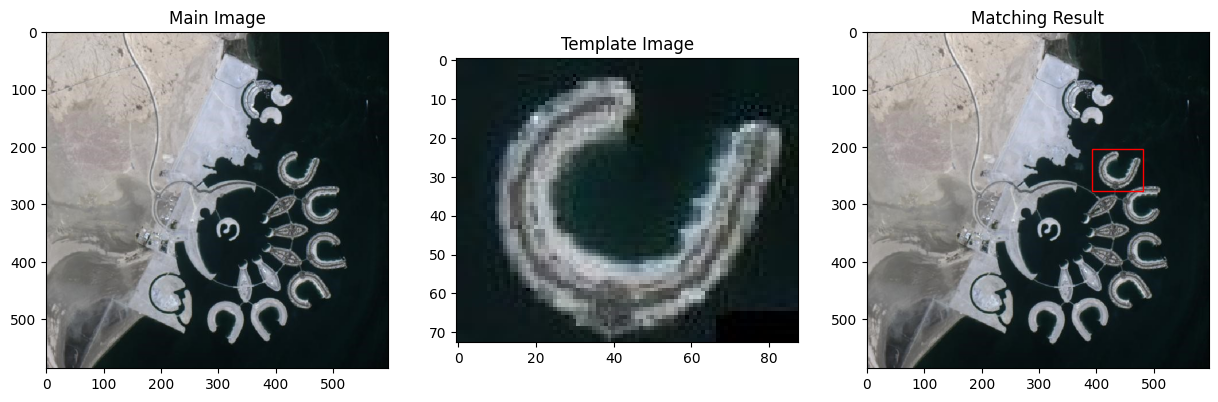

In [6]:
main_image = plt.imread(f'{path}/bahrain.jpg')
template_image = plt.imread(f'{path}/bahrain-template.jpg')

# Convert the images to grayscale if needed
main_image_gray = np.mean(main_image, axis=-1) if main_image.ndim == 3 else main_image
template_image_gray = np.mean(template_image, axis=-1) if template_image.ndim == 3 else template_image

# Perform template matching
matching_result = template_matching(main_image_gray, template_image_gray)

# Find the coordinates of the best match
min_y, min_x = np.unravel_index(np.argmin(matching_result), matching_result.shape)

# Plot the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.imshow(main_image, cmap='gray')
ax1.set_title('Main Image')

ax2.imshow(template_image, cmap='gray')
ax2.set_title('Template Image')

ax3.imshow(main_image, cmap='gray')
ax3.add_patch(plt.Rectangle((min_x, min_y), template_image.shape[1], template_image.shape[0], edgecolor='r', facecolor='none'))
ax3.set_title('Matching Result')

plt.show()